In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from google.colab import drive
import os
import matplotlib.pyplot as plt

In [ ]:
# Mount Google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

#path of training folder
train_path = '/content/drive/My Drive/Proj/Training'

#path of testing folder
test_path = '/content/drive/My Drive/Proj/Test'

#path of validation
valid_path = '/content/drive/My Drive/Proj/Validation'




#dataset_path = '/content/drive/My Drive/Cat-Dog-Dataset'
#os.listdir(dataset_path)

In [ ]:
#define input image attributes
img_width, img_height = 100, 100
#150x150 pixels and 3 channels, i.e., RGB
input_shape = (img_width, img_height, 3)

In [ ]:
#define model parameters
batch_size = 32
epochs = 50

In [ ]:
#CNN model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (5, 5), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(24, activation='softmax')  # Output layer
  ])

In [ ]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
# Print a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 64)        0

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 6240 images belonging to 24 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 3110 images belonging to 24 classes.


In [ ]:
history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/50
195/195 [==============================] - 3064s 16s/step - loss: 1.4080 - accuracy: 0.5165 - val_loss: 0.5027 - val_accuracy: 0.8186
Epoch 2/50
195/195 [==============================] - 65s 335ms/step - loss: 0.3098 - accuracy: 0.8878 - val_loss: 0.1675 - val_accuracy: 0.9333
Epoch 3/50
195/195 [==============================] - 64s 326ms/step - loss: 0.1708 - accuracy: 0.9394 - val_loss: 0.1085 - val_accuracy: 0.9559
Epoch 4/50
195/195 [==============================] - 64s 326ms/step - loss: 0.1452 - accuracy: 0.9505 - val_loss: 0.0990 - val_accuracy: 0.9588
Epoch 5/50
195/195 [==============================] - 65s 333ms/step - loss: 0.0656 - accuracy: 0.9764 - val_loss: 0.1004 - val_accuracy: 0.9659
Epoch 6/50
195/195 [==============================] - 59s 302ms/step - loss: 0.1006 - accuracy: 0.9673 - val_loss: 0.1600 - val_accuracy: 0.9613
Epoch 7/50
195/195 [==============================] - 65s 331ms/step - loss: 0.0755 - accuracy: 0.9768 - val_loss: 0.0871 - val_ac

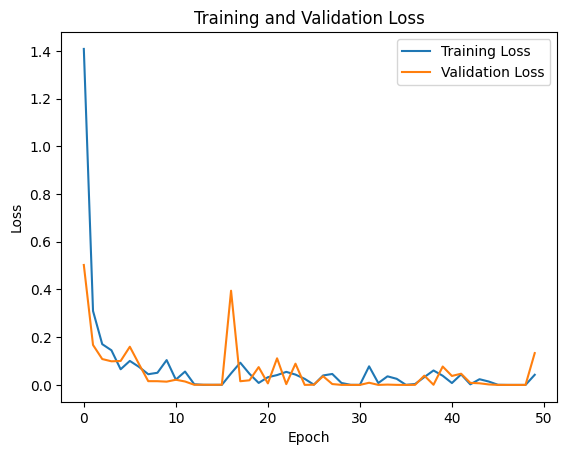

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

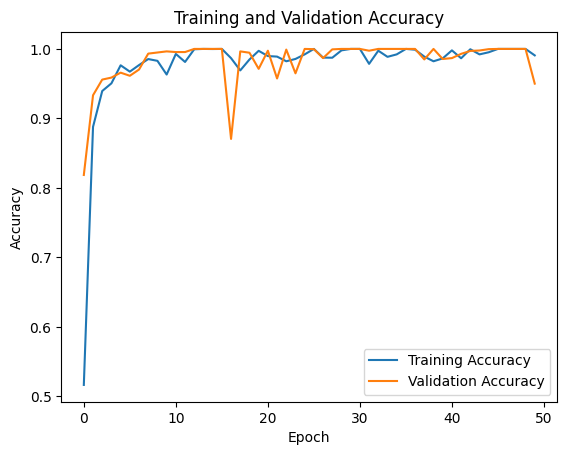

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the testing data
test_loss, test_accuracy = model.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


98/98 [==============================] - 20s 206ms/step - loss: 0.1339 - accuracy: 0.9498
Test Loss: 0.13385125994682312
Test Accuracy: 0.9498392343521118


1/1 [==============================] - 0s 18ms/step
Original Label: apple_pink_lady_1
Predicted Label: apple_pink_lady_1


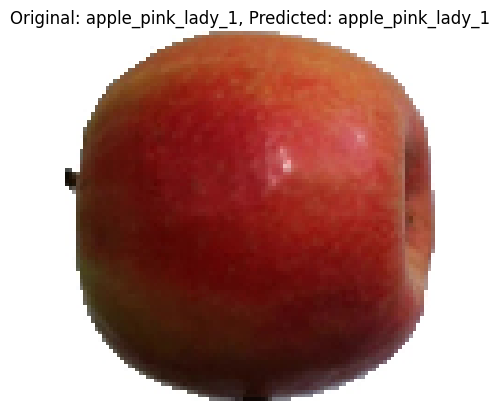

In [ ]:

import random

# Function to select a random image from the test directory
def get_random_image(test_path):
    class_folders = os.listdir(test_path)
    class_folders = [folder for folder in class_folders if not folder.startswith('.')]  # Exclude hidden files
    chosen_class = random.choice(class_folders)
    class_path = os.path.join(test_path, chosen_class)
    image_files = os.listdir(class_path)
    image_files = [file for file in image_files if file.endswith('.jpg') or file.endswith('.png')]  # Filter for image files
    chosen_image = random.choice(image_files)
    image_path = os.path.join(class_path, chosen_image)
    return image_path, chosen_class

# Get a random image and its original class label
img_path, original_label = get_random_image(test_path)

# Load and preprocess the image
img = image.load_img(img_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Convert single image to a batch.
img_array = img_array / 255.0  # Rescale image (same as done for training data)

# Predict the class of the image
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Map the predicted class index to the class label
class_indices = train_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}  # Invert the dictionary to map index to class label
predicted_label = class_labels[predicted_class_index]

# Output the original and predicted labels
print(f"Original Label: {original_label}")
print(f"Predicted Label: {predicted_label}")

# Display the image
plt.imshow(img)
plt.title(f"Original: {original_label}, Predicted: {predicted_label}")
plt.axis('off')
plt.show()
